# Project

If you are highly active on Facebook and Instagram, you must have seen ads based on elections by any of the political parties, especially BJP and INC. All the parties in India usually spend a lot of money on election campaigns. I recently collected data from Meta ads about how much money was spent on Instagram and Facebook ads by each political party during the Indian elections 2024 in each state. Perform elections ad spending analysis and show how it has impacted the voting patterns.

----

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [32]:
df1 = advertisers_data = pd.read_csv('C:/Users/35191/Desktop/DataScienceprojects/elections-data/advertisers.csv') 
df2 = location_data = pd.read_csv('C:/Users/35191/Desktop/DataScienceprojects/elections-data/locations.csv') 
df3 = results_data = pd.read_csv('C:/Users/35191/Desktop/DataScienceprojects/elections-data/results.csv')

In [33]:
df1.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [34]:
df2.head()

,Location name,Amount spent (INR)
0,Andaman & Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [35]:
df3.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [36]:
df3['State'] = df3['State'].str.strip().str.lower()

df2['Location name'] = df2['Location name'].str.strip().str.lower()

merged_data = df3.merge(
    df2,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,andaman & nicobar islands,377858.0
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [37]:
merged_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,andaman & nicobar islands,377858.0
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


In [38]:
Rna = merged_data['Amount spent (INR)'].isna().sum()
Rna

15

In [39]:
df = merged_data[['State','Amount spent (INR)']]
df

,State,Amount spent (INR)
0,andaman & nicobar islands,377858.0
1,arunachal pradesh,1385654.0
2,arunachal pradesh,1385654.0
3,assam,17478091.0
4,assam,17478091.0
...,...,...
545,west bengal,77244996.0
546,west bengal,77244996.0
547,west bengal,77244996.0
548,west bengal,77244996.0


In [40]:
def returnNA(df):
        return df[df['Amount spent (INR)'].isna()]

df = returnNA(df)
df.head()

,State,Amount spent (INR)
102,NaN,NaN
191,NaN,NaN
285,NaN,NaN
382,NaN,NaN
392,ladakh,NaN


In [41]:
df.shape

(15, 2)

Total ad spent by state:

# Sum amount spent on election by state

In [42]:
state_ad_spent = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()
state_ad_spent.head()

,State,Amount spent (INR)
0,andaman & nicobar islands,3.778580e+05
1,andhra pradesh,2.520493e+09
2,arunachal pradesh,2.771308e+06
3,assam,2.446933e+08
4,bihar,2.144770e+09


In [43]:
# Ensure 'State' is a string type
state_ad_spent['State'] = state_ad_spent['State'].astype(str)
state_ad_spent['Amount spent (INR)'] = state_ad_spent['Amount spent (INR)'].astype(float)

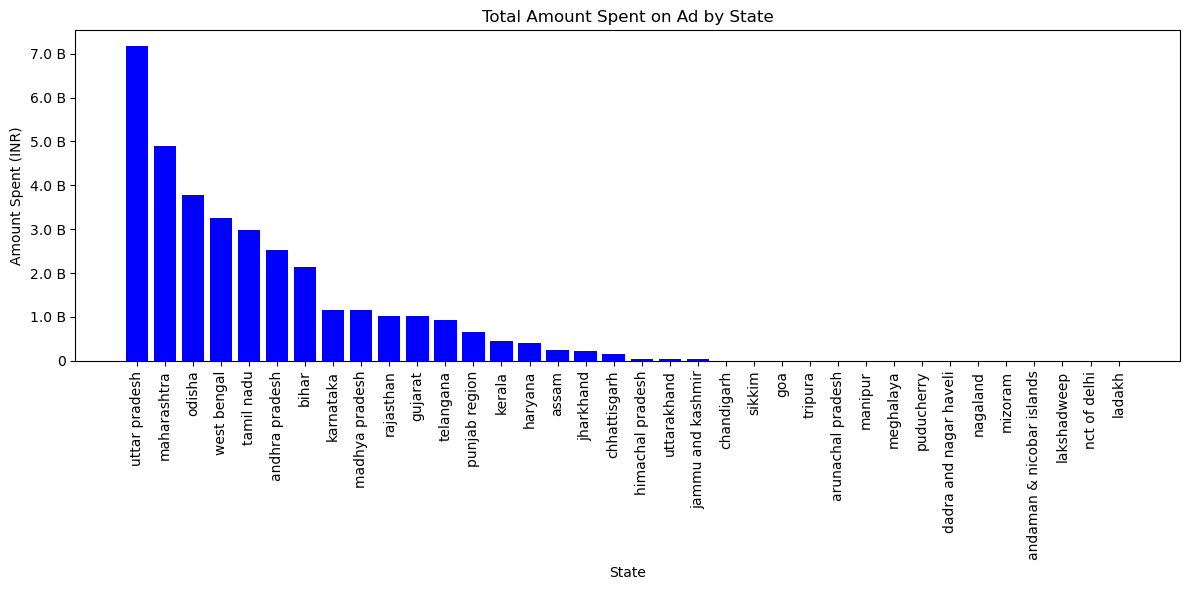

In [62]:
# Sort the data by 'Amount spent (INR)' in descending order
state_ad_spent = state_ad_spent.sort_values(by='Amount spent (INR)', ascending=False)

# Extract the x and y data again after cleaning
x = state_ad_spent['State']
y = state_ad_spent['Amount spent (INR)']

# Define a function to format y-axis labels in millions
def billions_formatter(x, pos):
    if x == 0:
        return '0'  # Return just '0' for zero values
    else:
        return f'{x * 1e-9:.1f} B'  # Converts the number to billions and formats it with one decimal place

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Amount Spent (INR)')
plt.title('Total Amount Spent on Ad by State')

# Format the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, ha='center')

# Show the plot
plt.tight_layout()

#Save the graph as a .jpg file
plt.savefig('C:/Users/35191/DataAnalysis/graph1.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution
plt.show()

The bar graph shows the total ad spend (in INR) by state. Uttar Pradesh leads significantly with the highest ad spend, followed by Maharashtra and Odisha. States like West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar also show substantial ad expenditures. In contrast, states such as Lakshadweep, Dadra & Nagar Haveli, Daman & Diu, Andaman & Nicobar Islands, and Arunachal Pradesh have the lowest ad spend. It indicates that larger and more populous states tend to spend more on ads, likely reflecting their greater political significance and larger voter base.

## Now, let’s have a look at the average voter turnout by state:

In [47]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()
state_voter_turnout.head()

,State,Polled (%)
0,andaman & nicobar islands,64.100000
1,andhra pradesh,80.770800
2,arunachal pradesh,78.455000
3,assam,80.882857
4,bihar,56.329500


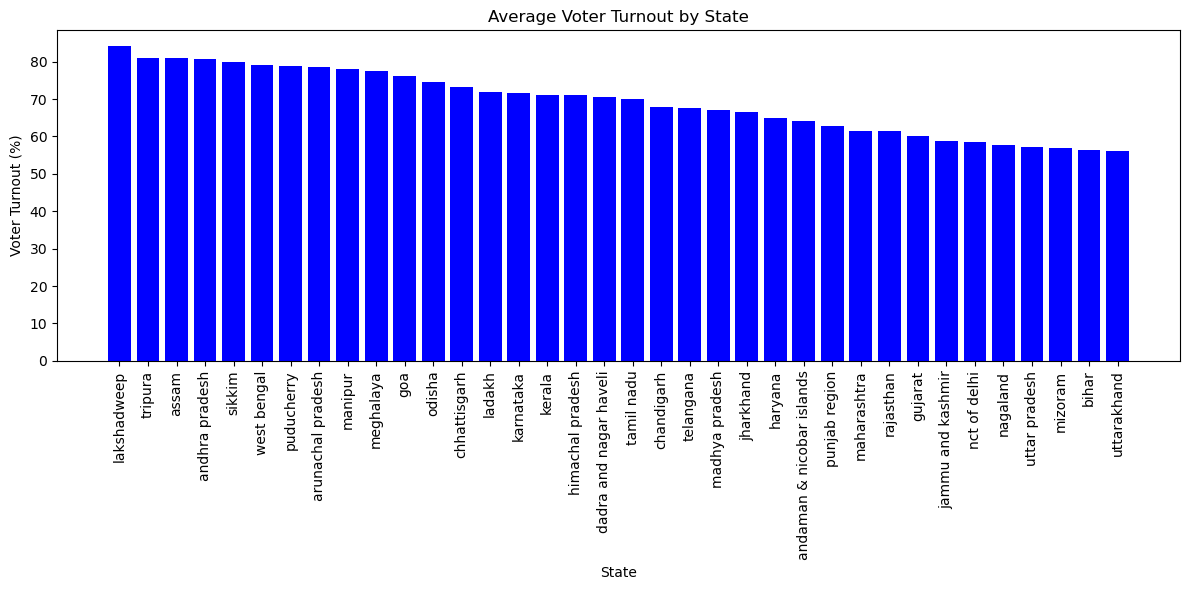

In [49]:
# Sort the data by 'Amount spent (INR)' in descending order
state_voter_turnout = state_voter_turnout.sort_values(by='Polled (%)', ascending=False)

# Extract the x and y data again after cleaning
x = state_voter_turnout['State']
y = state_voter_turnout['Polled (%)']

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Average Voter Turnout by State')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, ha='center')

# Show the plot
plt.tight_layout()
#Save the graph as a .jpg file
#plt.savefig('C:/Users/35191/DataAnalysis/graph2.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution
plt.show()

Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%. It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.

## Now, let’s have a look at the top 5 parties by ad spend:

In [50]:
df1['Amount spent (INR)'] = pd.to_numeric(df1['Amount spent (INR)'], errors='coerce')
df1.dropna(subset=['Amount spent (INR)'], inplace=True)
party_ad_spend = df1.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
top_5_parties = party_ad_spend.head(5).reset_index()
top_5_parties

,Page name,Amount spent (INR)
0,Bharatiya Janata Party (BJP),193854342.0
1,Ama Chinha Sankha Chinha,112412941.0
2,Indian National Congress,108787100.0
3,Ellorum Nammudan,23806041.0
4,BJP Odisha,19573782.0


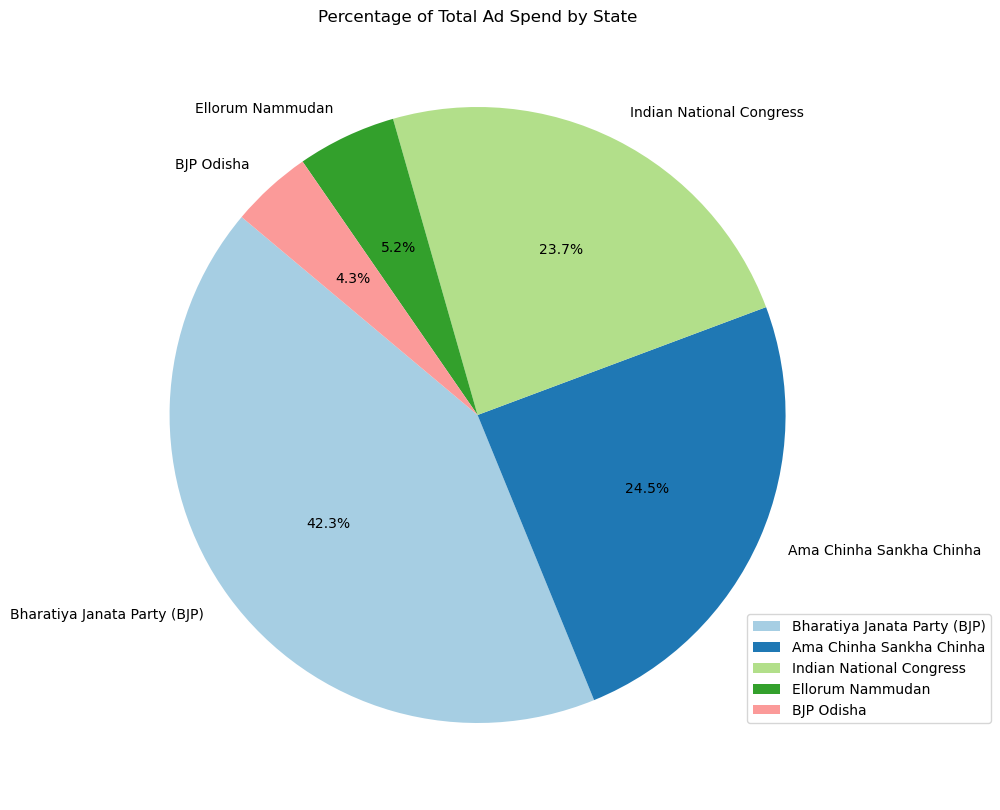

In [51]:
plt.figure(figsize=(10, 10))
plt.pie(top_5_parties['Amount spent (INR)'], labels=top_5_parties['Page name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Percentage of Total Ad Spend by State')

# Display the pie chart
plt.legend(loc=(0.85, 0.1))
#Save the graph as a .jpg file
#plt.savefig('C:/Users/35191/DataAnalysis/graph3.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution
plt.show()

The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.


## Now, let’s have a look at the correlation between ad spend and voter turnout:



In [52]:
# calculate the correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)             1.00000    -0.00893
Polled (%)                    -0.00893     1.00000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.00893. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

## Now, let’s have a look at the relationship between ad spend and voter turnout by parliamentary constituency:

In [53]:
merged_constituency_data = df3.merge(
    df2,
    left_on='State',
    right_on='Location name',
    how='left'
)
merged_constituency_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,andaman & nicobar islands,377858.0
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


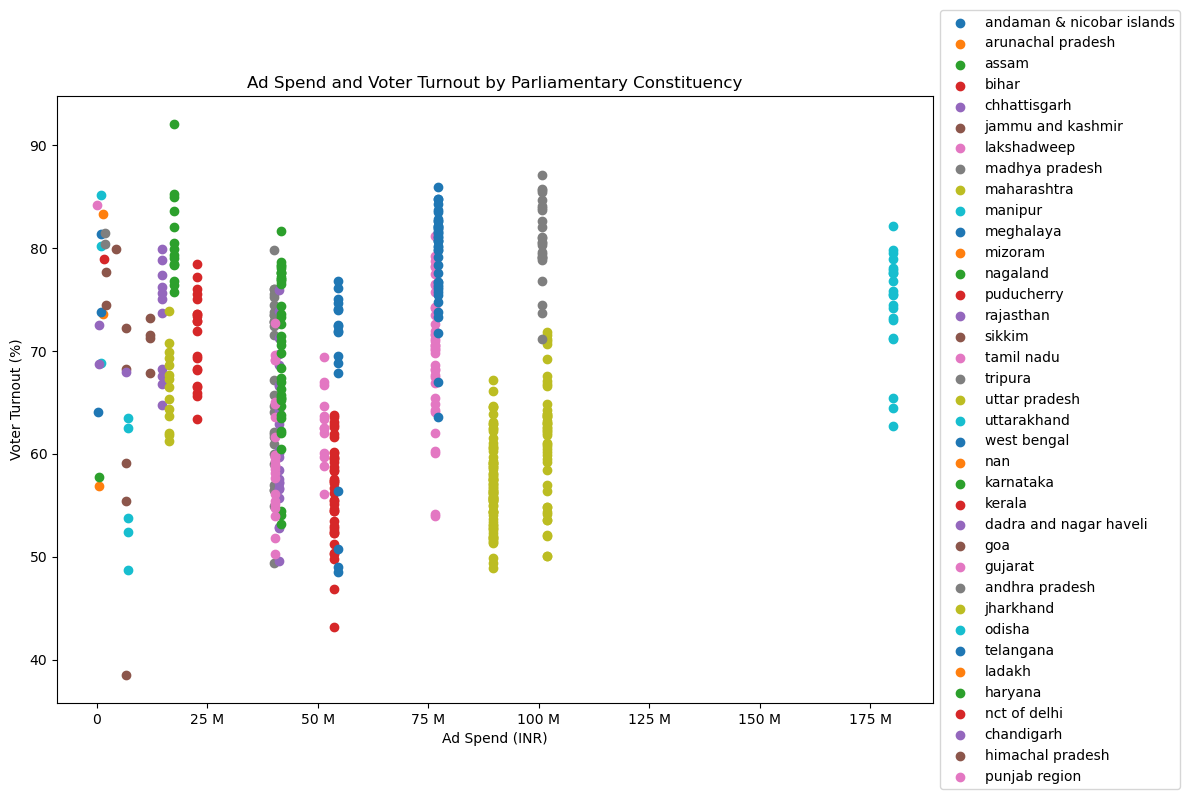

In [57]:
# Function to format x-axis labels in millions
def millions_formatter(x, pos):
    if x == 0:
        return '0'  # Return just '0' for zero values
    else:
        return f'{x * 1e-6:.0f} M'  # Converts the number to millions and formats it as an integer with 'M'

# Scatter plot using Matplotlib
plt.figure(figsize=(12, 8))

# Plot data and use different colors for each state
for state in merged_constituency_data['State'].unique():
    state_data = merged_constituency_data[merged_constituency_data['State'] == state]
    plt.scatter(state_data['Amount spent (INR)'], state_data['Polled (%)'], label=state)

# Add labels and title
plt.xlabel('Ad Spend (INR)')
plt.ylabel('Voter Turnout (%)')
plt.title('Ad Spend and Voter Turnout by Parliamentary Constituency')

# Format the x-axis to show values in millions
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Moves the legend outside the plot

# Display the plot
plt.tight_layout()
#Save the graph as a .jpg file
#plt.savefig('C:/Users/35191/DataAnalysis/graph4.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution
plt.show()


It shows that higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

## Now, let’s have a look at the distribution of ad spending:

In [58]:
import seaborn as sns

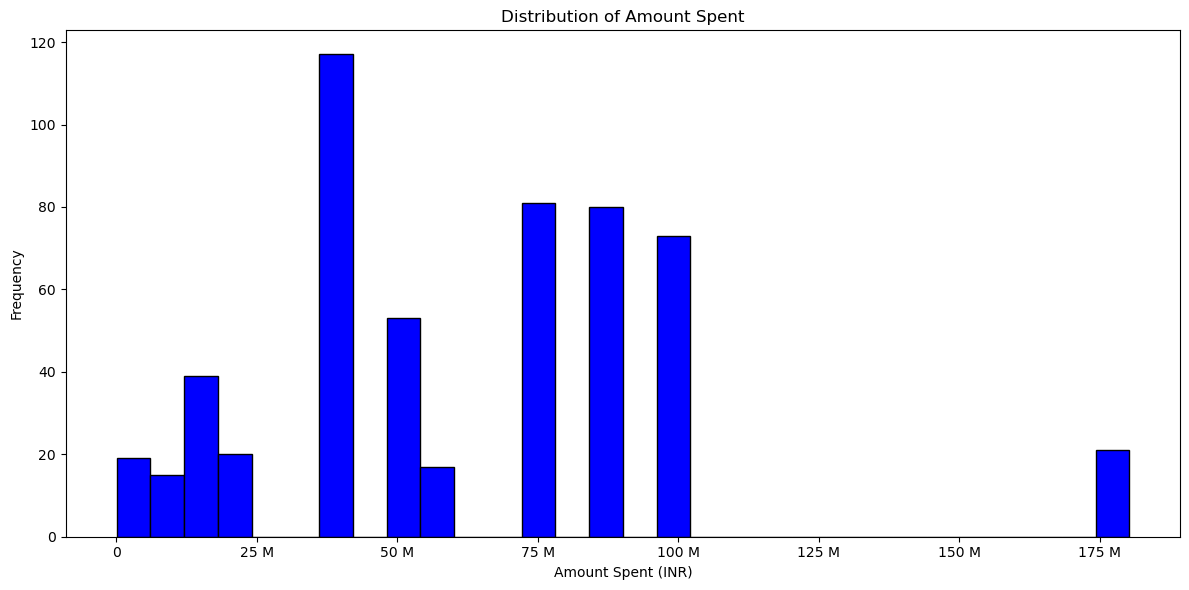

In [59]:
# Plot a histogram of the 'Amount spent (INR)' column with 30 bins
plt.figure(figsize=(12, 6))

plt.hist(merged_data['Amount spent (INR)'], bins=30, color='blue', edgecolor='black')
# Add labels and title
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Spent')

'''# Add a box plot on top of the histogram using seaborn
sns.boxplot(
    x=merged_data['Amount spent (INR)'],
    width=0.1,  # Adjust the width to control how thick the box plot appears
    color='orange',
    fliersize=2,  # Control the size of outlier points
    whis=1.5  # Adjust whisker length, showing 1.5 times the interquartile range
)'''

def millions_formatter(x, pos):
    if x==0:
        return '0'
    else:
        return f'{x * 1e-6:.0f} M'  # Converts the number to millions and formats it with 'M'

plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the plot
plt.tight_layout()
#Save the graph as a .jpg file
plt.savefig('C:/Users/35191/DataAnalysis/graph5.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution
plt.show()

The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

## Now, let’s analyze ad spending and voter turnout by election phase:

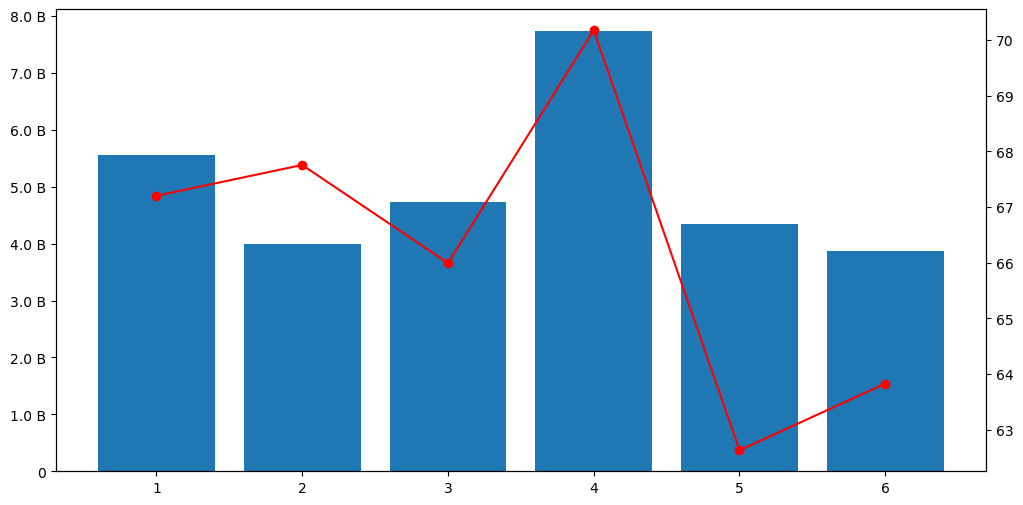

In [61]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

# Create the figure and plot the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

x=phase_analysis['Phase']
y=phase_analysis['Amount spent (INR)']
z=phase_analysis['Polled (%)']

ax1.bar(x, y)

ax2=ax1.twinx()
ax2.plot(x, z, color='red', marker='o')

def billions_formatter(x, pos):
    if x==0:
        return '0'
    else:
        return f'{x * 1e-9:.1f} B'  # Converts the number to millions and formats it with 'B'

ax1.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#Save the graph as a .jpg file
plt.savefig('C:/Users/35191/DataAnalysis/graph6.jpg', format='jpg', dpi=300)  # dpi=300 for high resolution


There is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.

In [14]:
#merged_data.to_csv('C:/Users/35191/DataAnalysis/merged_data.csv')

# Conclusion
Overall, the analyses indicate that higher ad spend does not guarantee higher voter turnout and voter engagement is influenced by various other factors. Larger and more significant states tend to spend more on ads, but this does not necessarily translate to higher voter participation. Political parties, particularly the BJP, invest heavily in advertising, yet the effectiveness of this spending in increasing voter turnout is questionable.